In [2]:
# !pip install lightgbm
# !pip install tensorflow
# !pip install cufflinks
# !pip install --upgrade keras

  Using cached lightgbm-4.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lightgbm: filename=lightgbm-4.3.0-py3-none-macosx_12_0_arm64.whl size=1390116 sha256=46bbfaa8242155d38b2547ed720ecb42db2126ab9d60eece6b651056eb3aacf3
  Stored in directory: /Users/panayotis/Library/Caches/pip/wheels/f4/d1/f4/3cd66516e5a05b0879846879dfb06e5a087f453adb405a5999
Successfully built lightgbm


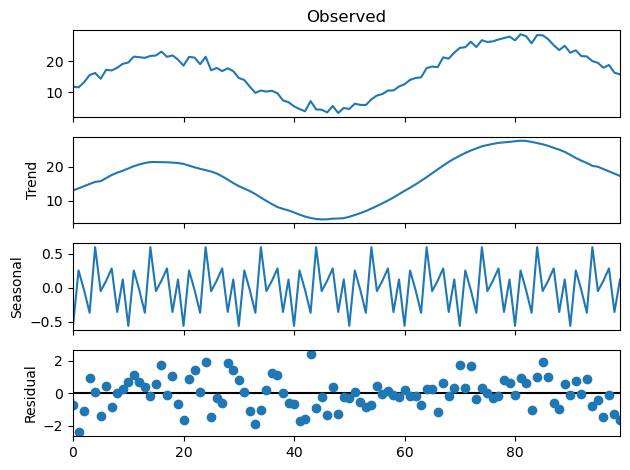

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some data
np.random.seed(0)
time = np.arange(100)
level = 10
trend = time * 0.1
seasonal = 10 * np.sin(time / 10)
noise = np.random.normal(size=time.size)

# Combine to form a time series
data = level + trend + seasonal + noise

# Decompose the time series
result = seasonal_decompose(data, period=10, model='additive', extrapolate_trend='freq')

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()


In [1]:
import lightgbm as lgb

import numpy as np 
import pandas as pd

import os
import time

import datetime as datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf


import os
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dense
from os import walk
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from random import random
from random import randint
from numpy import array
from numpy import zeros
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed

from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.layers import RepeatVector
from keras.layers import Bidirectional
from keras.layers import GRU

from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
#from keras.layers.convolutional import Conv1D
#from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

%matplotlib inline
cf.set_config_file(offline=True)

In [2]:
df = pd.read_csv("2018Floor1.csv", parse_dates=['Date'], index_col='Date')

# Preprocessing

In [3]:
df.head()

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
Date,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86


In [5]:
print(df.index.min(), df.index.max()) # check the first and the last date

2018-07-01 00:00:00 2018-12-31 23:59:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264960 entries, 2018-07-01 00:00:00 to 2018-12-31 23:59:00
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   z1_Light(kW)  263499 non-null  float64
 1   z1_Plug(kW)   264474 non-null  float64
 2   z2_AC1(kW)    263442 non-null  float64
 3   z2_AC2(kW)    263503 non-null  float64
 4   z2_AC3(kW)    263503 non-null  float64
 5   z2_AC4(kW)    263503 non-null  float64
 6   z2_Light(kW)  263526 non-null  float64
 7   z2_Plug(kW)   235125 non-null  float64
 8   z3_Light(kW)  264446 non-null  float64
 9   z3_Plug(kW)   263503 non-null  float64
 10  z4_Light(kW)  264445 non-null  float64
dtypes: float64(11)
memory usage: 24.3 MB


In [7]:
df.describe()

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
count,263499.000000,264474.000000,263442.000000,263503.000000,263503.000000,263503.000000,263526.000000,235125.000000,264446.000000,263503.000000,264445.000000
mean,6.388401,4.182152,29.007512,4.769192,0.009434,0.007446,14.754283,15.625258,23.582280,1.163607,17.114397
std,8.758483,6.938276,22.099131,12.370302,0.048780,0.008278,3.153056,2.595695,16.837519,0.719731,18.517960
min,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.640000,0.040000,0.020000,0.010000,0.000000,13.200000,14.360000,13.240000,0.760000,0.060000
50%,0.020000,0.870000,44.280000,0.020000,0.010000,0.010000,14.800000,15.890000,20.770000,0.920000,9.910000
75%,12.980000,1.260000,47.030000,0.030000,0.010000,0.010000,16.300000,17.090000,27.410000,1.480000,34.010000
max,134.970000,57.860000,131.550000,798.720000,24.950000,0.060000,55.280000,55.120000,4762.430000,22.220000,512.010000


In [8]:
print("Is DataFrame sorted by datetime index:", df.index.is_monotonic_increasing)

Is DataFrame sorted by datetime index: True


In [9]:
df.isnull().sum()

z1_Light(kW)     1461
z1_Plug(kW)       486
z2_AC1(kW)       1518
z2_AC2(kW)       1457
z2_AC3(kW)       1457
z2_AC4(kW)       1457
z2_Light(kW)     1434
z2_Plug(kW)     29835
z3_Light(kW)      514
z3_Plug(kW)      1457
z4_Light(kW)      515
dtype: int64

In [10]:
# Replacing the null values with mean.
df['z1_Light(kW)']=df['z1_Light(kW)'].fillna(df['z1_Light(kW)'].mean())

df['z1_Plug(kW)']=df['z1_Plug(kW)'].fillna(df['z1_Plug(kW)'].mean())

df['z2_AC1(kW)']=df['z2_AC1(kW)'].fillna(df['z2_AC1(kW)'].mean())

df['z2_AC2(kW)']=df['z2_AC2(kW)'].fillna(df['z2_AC2(kW)'].mean())

df['z2_AC3(kW)']=df['z2_AC3(kW)'].fillna(df['z2_AC3(kW)'].mean())

df['z2_AC4(kW)']=df['z2_AC4(kW)'].fillna(df['z2_AC4(kW)'].mean())

df['z2_Light(kW)']=df['z2_Light(kW)'].fillna(df['z2_Light(kW)'].mean())

df['z2_Plug(kW)']=df['z2_Plug(kW)'].fillna(df['z2_Plug(kW)'].mean())

df['z3_Light(kW)']=df['z3_Light(kW)'].fillna(df['z3_Light(kW)'].mean())

df['z3_Plug(kW)']=df['z3_Plug(kW)'].fillna(df['z3_Plug(kW)'].mean())

df['z4_Light(kW)']=df['z4_Light(kW)'].fillna(df['z4_Light(kW)'].mean())

In [11]:
null_elem = df.isnull().sum().sum()
print('Total number of NaN in Units is:',null_elem)

Total number of NaN in Units is: 0


# EDA Analysis

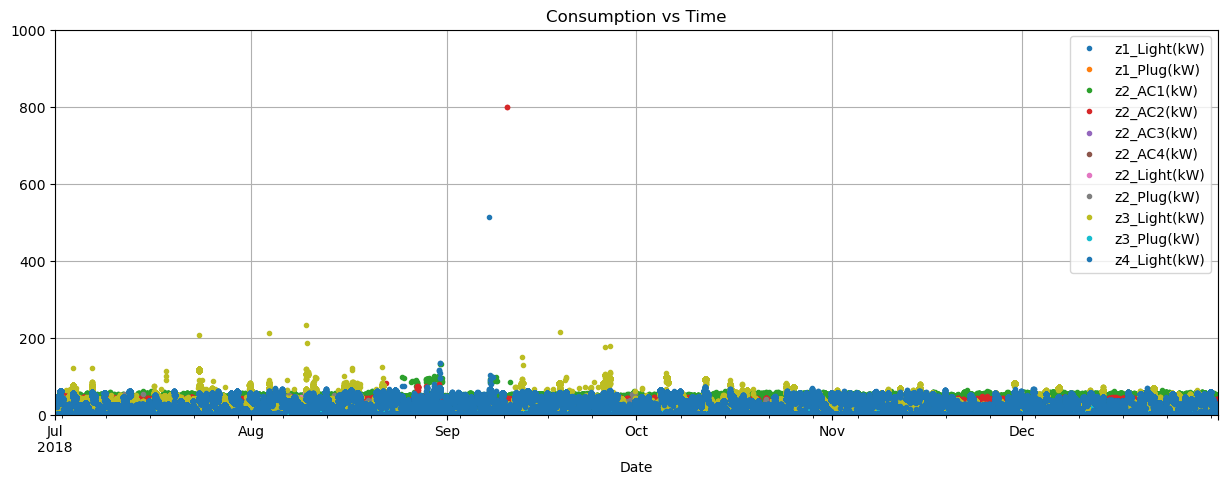

In [12]:
df.plot(style='.', figsize=(15,5), title='Consumption vs Time', grid=True) 
plt.ylim([0, 1000])
plt.show()

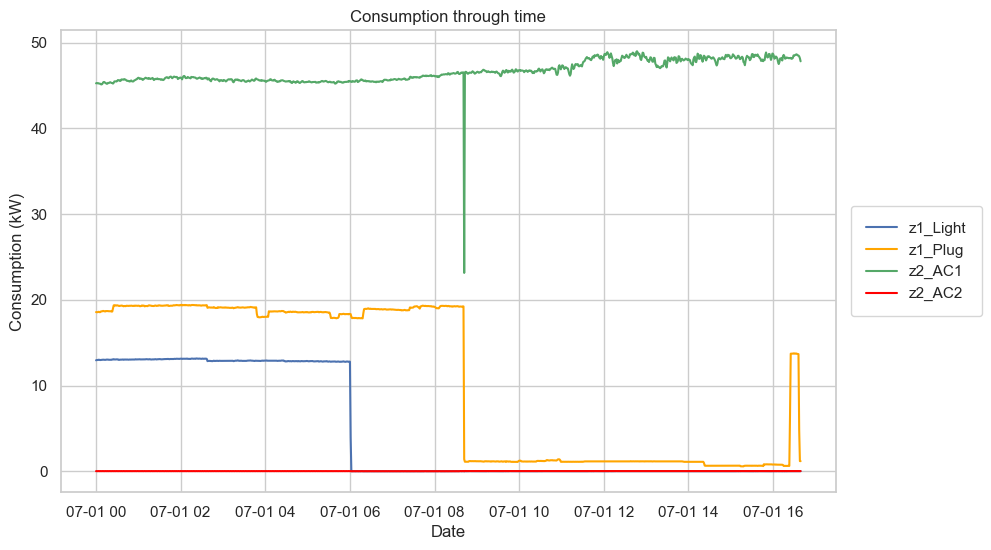

In [13]:
sns.set(style="whitegrid")
#sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(df['z1_Light(kW)'][:1000], label='z1_Light', color='b')
plt.plot(df['z1_Plug(kW)'][:1000], label='z1_Plug', color='orange')
plt.plot(df['z2_AC1(kW)'][:1000], label='z2_AC1', color='g')
plt.plot(df['z2_AC2(kW)'][:1000], label='z2_AC2', color='red')

ax.set_ylabel('Consumption (kW)')
ax.set_xlabel('Date')
ax.set_title('Consumption through time')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

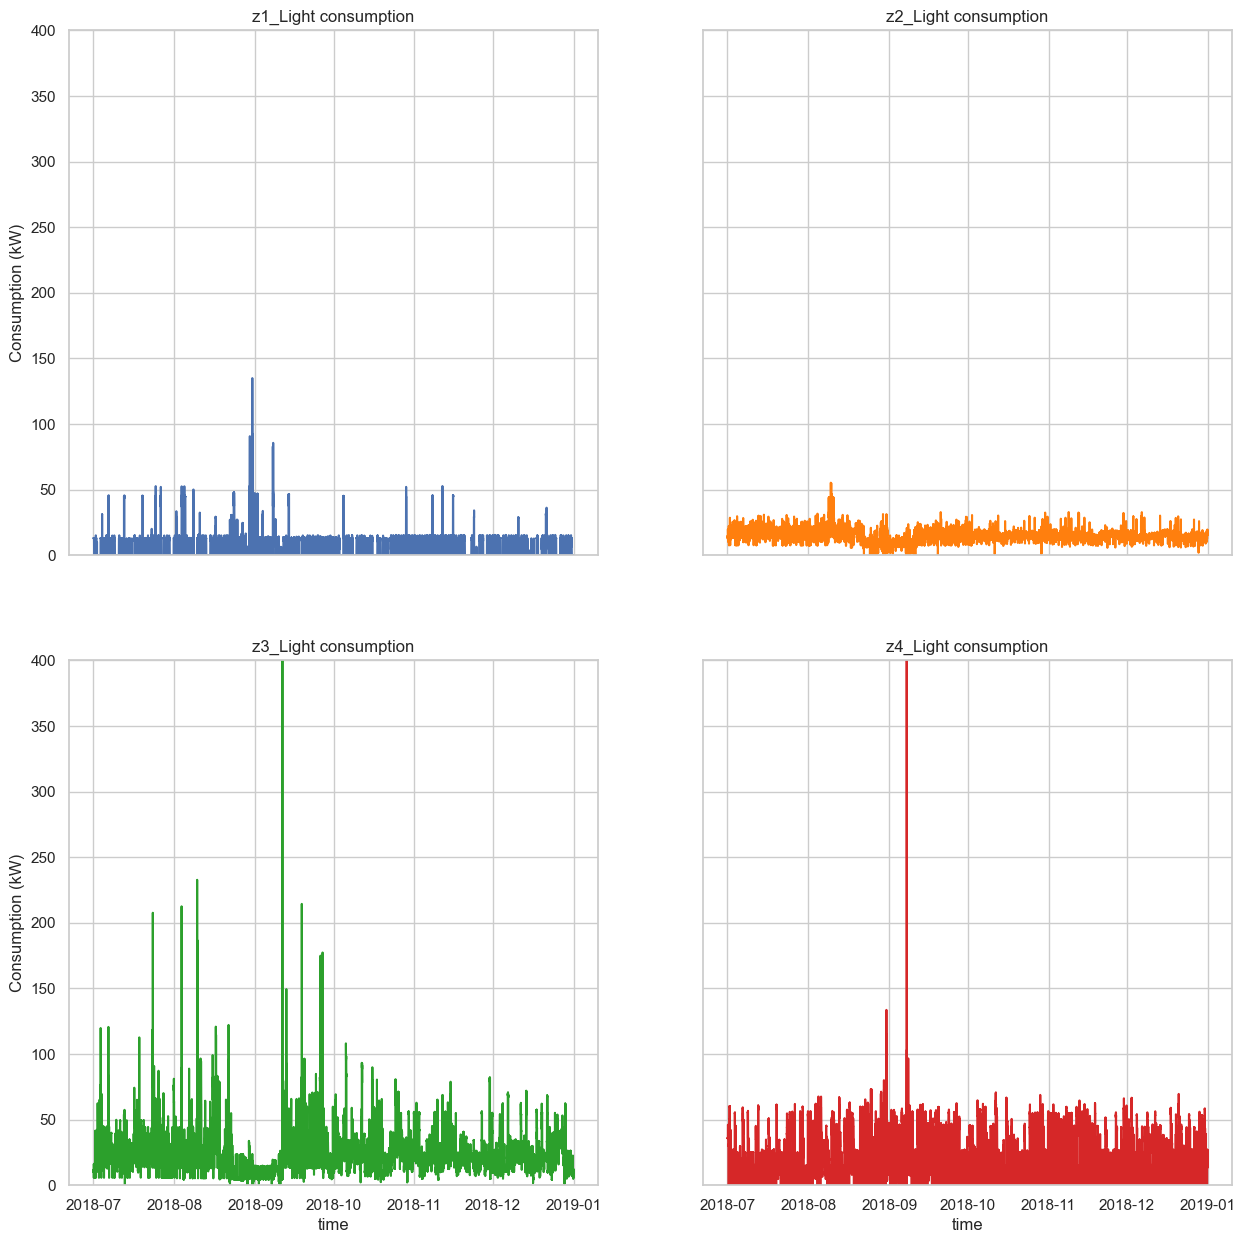

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

axs[0, 0].plot(df['z1_Light(kW)'])
axs[0, 0].set_title('z1_Light consumption')
axs[0, 0].set_ylim([0, 400])
axs[0, 1].plot(df['z2_Light(kW)'], 'tab:orange')
axs[0, 1].set_title('z2_Light consumption')
axs[0, 1].set_ylim([0, 400])
axs[1, 0].plot(df['z3_Light(kW)'], 'tab:green')
axs[1, 0].set_title('z3_Light consumption')
axs[1, 0].set_ylim([0, 400])
axs[1, 1].plot(df['z4_Light(kW)'], 'tab:red')
axs[1, 1].set_title('z4_Light consumption')
axs[1, 1].set_ylim([0, 400])

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='Consumption (kW)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Split the dataset into train and test data

In [ ]:
# df['date'] =pd.to_datetime(df['Date'].dt.date)
# update_df = df
# update_df.drop(columns=['Date'])

In [15]:
df_temp = df
df_temp['weekday'] = df_temp.index.weekday
df_temp['hour'] = df_temp.index.hour
#df_temp['date'] = pd.to_datetime(df_temp['Date'].dt.date)
df.head()
#df_temp = df_temp.set_index('Date').drop(['date'],axis=1)

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW),weekday,hour
Date,,,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76,6,0
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81,6,0
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78,6,0
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83,6,0
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86,6,0


In [15]:
traindata = df_temp.loc[:'2018-12'].copy()
traindata = traindata.iloc[:,0:11]

testdata = df_temp.loc['2018-12':'2018-12'].copy()
testdata = testdata.iloc[:,0:11]

# Normalize Data

Normalization is a data transformation process that aligns data values to a common scale or distribution of values so that. Normalization includes adjusting the scale of values to a similar metric or adjusting the time scales to be able to compare like periods.<br>
In this case we use ***Min-Max Scaling*** which works by subtracting the minimum value from each column’s highest value and dividing by the range. Each new column has a minimum value of 0 and a maximum value of 1.

In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
traindata_norm = pd.DataFrame(min_max_scaler.fit_transform(traindata), columns=traindata.columns)
testdata_norm = pd.DataFrame(min_max_scaler.fit_transform(testdata), columns=testdata.columns)

traindata_norm

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
0,0.095873,0.320774,0.343850,0.000013,0.000401,0.000000,0.248915,0.320029,0.002293,0.040054,0.069842
1,0.096095,0.320601,0.344154,0.000025,0.000401,0.166667,0.248915,0.312228,0.002299,0.039154,0.069940
2,0.096095,0.320601,0.343850,0.000013,0.000401,0.166667,0.249457,0.311684,0.002297,0.038704,0.069881
3,0.096170,0.321120,0.344002,0.000025,0.000401,0.000000,0.249819,0.301887,0.002297,0.038254,0.069979
4,0.096392,0.321466,0.343698,0.000025,0.000401,0.166667,0.250181,0.284652,0.002303,0.038254,0.070038
...,...,...,...,...,...,...,...,...,...,...,...
264955,0.000074,0.009851,0.374715,0.001715,0.000401,0.166667,0.326158,0.255624,0.002144,0.016652,0.028476
264956,0.000074,0.009851,0.345370,0.001703,0.000401,0.000000,0.320550,0.206277,0.002127,0.017102,0.028515
264957,0.000074,0.010024,0.017485,0.001703,0.000401,0.166667,0.316208,0.205914,0.002114,0.017102,0.028456
264958,0.000148,0.009851,0.017485,0.001690,0.000000,0.000000,0.315304,0.206640,0.002098,0.016652,0.028496


# Pre-prosessing Function for Sliding-Window

We utilize a sliding window technique transforming the time­series forecasting problem to a supervised one. More accurately, we obtain
one flattened sequence and split it into several sub­sequences based on a sliding window with
length 5000. Each subsequence is slided by one time-step.<br>

In order to decrease the size from the original subsequence (5000), we calculate the mean value for every 10 values obtaining a 10 times smaller subsequence. 

In [17]:
def decrease_seq(sequence, mean_batch=10):
  # reshape sequence
  seq = np.array(sequence).T

  new_sequence = []
  for j in seq:
      new_j = []

      temp_sum = 0
      for i,item in enumerate(j,start=1):
          temp_sum+=item
          if i%mean_batch == 0:
              mean_temp = temp_sum/mean_batch
              temp_sum=0
              new_j.append(mean_temp)
      new_sequence.append(new_j)
  return new_sequence

In [18]:
def extract_X_y_from_file(array, X_num, y_num):
    """ 
    Function that pre-process the data with a sliding-window supervised 
    learning approach extracting X and y

    - X_num: Input Window Length (N)
    - y_num: Number of prediction time-steps (M). We calculate the y as a mean 
              of the next M time-slots.
    """
    X = []
    y = []
    
    iterations = len(array)
    for i in range(0,iterations,30):
        if i%1000==0:
          print(i,'/',iterations)
        ### check if we reach to end
        if i+X_num + y_num > len(array):
            break          
        ### calculate X,y
        X_temp = array[i: i+X_num]
        # decrease seq
        new_X_temp = decrease_seq(X_temp)

        y_temp = array[i+X_num: i+X_num + y_num]
        y_temp = [y_temp[0][:11]]

        ### format y use mean
        new_y_temp = []
        # for every column
        for j in range(11):
            j_temp = []
            # for every row
            for i in range(y_num):
                row = y_temp[i][j]                

                j_temp.append(row)

            # obtain mean
            new_y_temp.append(np.mean(j_temp))                        
        # append
        X.append(new_X_temp)
        y.append(new_y_temp)        
        
    return X,y

In [19]:
def create_data(df, X_num = 5000, y_num = 1):
    """
    Function that reads all data csvs and calls the above mentioned function to
    extract X and y
    """
    all_X = []
    all_y = []

    # convert to list
    array = df.values.tolist()

    # create X and y
    X,y = extract_X_y_from_file(array, X_num, y_num)

    # add to final data
    all_X = all_X + X
    all_y = all_y + y

    return all_X, all_y

# Sliding-Window Approach

Create windows of data with the sliding-window technique to construct a supervised learning problem.

### Training Data

In [20]:
X_train, y_train = create_data(df=traindata_norm)

0 / 264960
3000 / 264960
6000 / 264960
9000 / 264960
12000 / 264960
15000 / 264960
18000 / 264960
21000 / 264960
24000 / 264960
27000 / 264960
30000 / 264960
33000 / 264960
36000 / 264960
39000 / 264960
42000 / 264960
45000 / 264960
48000 / 264960
51000 / 264960
54000 / 264960
57000 / 264960
60000 / 264960
63000 / 264960
66000 / 264960
69000 / 264960
72000 / 264960
75000 / 264960
78000 / 264960
81000 / 264960
84000 / 264960
87000 / 264960
90000 / 264960
93000 / 264960
96000 / 264960
99000 / 264960
102000 / 264960
105000 / 264960
108000 / 264960
111000 / 264960
114000 / 264960
117000 / 264960
120000 / 264960
123000 / 264960
126000 / 264960
129000 / 264960
132000 / 264960
135000 / 264960
138000 / 264960
141000 / 264960
144000 / 264960
147000 / 264960
150000 / 264960
153000 / 264960
156000 / 264960
159000 / 264960
162000 / 264960
165000 / 264960
168000 / 264960
171000 / 264960
174000 / 264960
177000 / 264960
180000 / 264960
183000 / 264960
186000 / 264960
189000 / 264960
192000 / 264960
1

In [ ]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [21]:
len(X_train)

8666

In [22]:
len(y_train)

8666

In [23]:
X_train = np.array(X_train)
X_train.shape

(8666, 11, 500)

In [24]:
y_train = np.array(y_train)
print(y_train.shape)

(8666, 11)


### Testing Data

In [25]:
test_X = []
test_y = []

test_X, test_y = create_data(df=testdata_norm)

X_test = np.array(test_X)
print(X_test.shape)

y_test = np.array(test_y)
print(y_test.shape)

0 / 44640
3000 / 44640
6000 / 44640
9000 / 44640
12000 / 44640
15000 / 44640
18000 / 44640
21000 / 44640
24000 / 44640
27000 / 44640
30000 / 44640
33000 / 44640
36000 / 44640
39000 / 44640
(1322, 11, 500)
(1322, 11)


In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8666, 11, 500)
(8666, 11)
(1322, 11, 500)
(1322, 11)


# CNN - FNN (Convolutional Neural Networks - Feedforward Neural Network)

**Convolutional Neural Networks** are a specific deep learning technique widely used in the
field of computer vision. One of their primary characteristics is the use of kernel filters to extract low­level features from the input data by constructing a feature map. Moreover, they
utilize pooling layers to extract dominant features, deal with the noise and perform dimensionality reduction resulting, this way, in a more efficient and faster model training. Finally,
they also utilize fully connected layers and feed them with the information gathered from
prior layers to learn a suitable non­linear function.<br>

__For the models's implementation we use CNN because after selecting only specific features the training process will be faster and have better accuracy.__ 

**Feedforward Neural Networks (FNN)** are the first simple Artificial Neural
Networks (ANN) that do not form node cycle connections and move forward from one layer.<br>

The **structure** of NN consists of the input, several hidden, and
the output layers. In addition, every layer contains numerous neuron nodes that connect with nodes in prior and following layers with weighted edges. Every neuron calculates its weighted
input sum, and whether it is above or below a threshold value based on an activation function,
it produces the appropriate output to the next layer.<BR>

**Feedforward Neural Networks** utilize the backpropagation approach to reduce their prediction error. Specifically, the model’s output is compared with the actual values, and the
error is fed back to the network. It traverses the opposite­backward direction, adjusting the
weights utilizing the gradient descent approach. This way, it finds the appropriate weights,
enhancing the model’s predictive performance. We implement a Feedforward Neural Network utilizing the Tensorflow­Keras API.

**Feedforward Neural Networks** utilize the backpropagation approach to reduce their prediction error. Specifically, the model’s output is compared with the actual values, and the
error is fed back to the network. It traverses the opposite­backward direction, adjusting the
weights utilizing the gradient descent approach. This way, it finds the appropriate weights,
enhancing the model’s predictive performance. We implement a Feedforward Neural Network utilizing the Tensorflow­Keras API.

In [27]:
# define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(11,500)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(11))
model.compile(optimizer='adam', loss='mse')
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        12,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,025 (437.60 KB)

 Trainable params: 112,025 (437.60 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070
Epoch 2/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031
Epoch 3/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 4/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024
Epoch 5/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 6/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 7/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022
Epoch 8/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021
Epoch 9/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020
Epoch 10/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020
Epoch 11/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 12/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 13/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019
Epoch 14/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0019
Epoch 15/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1

271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2740e-04
Epoch 156/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8957e-04
Epoch 157/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8021e-04
Epoch 158/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5413e-04
Epoch 159/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6612e-04
Epoch 160/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6745e-04
Epoch 161/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6972e-04
Epoch 162/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7168e-04
Epoch 163/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4417e-04
Epoch 164/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7661e-04
Epoch 165/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6103e-04
Epoch 166/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5439e-04
Epoch 167/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0353e-04
Epoch 168/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

## Training Evaluation

In [29]:
yhat_training = model.predict(X_train)

271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_train, yhat_training)
print('RMSE training',rms)

mae = mean_absolute_error(y_train, yhat_training)
print('MAE: training',mae)

RMSE training 0.0003239799867922675
MAE: training 0.008458333800518735


In [31]:
y_data_inv = min_max_scaler.inverse_transform(y_train)
yhat_training_inv = min_max_scaler.inverse_transform(yhat_training)

mae_inv = mean_absolute_error(y_data_inv.T, yhat_training_inv.T)
print('MAE training',mae_inv)

MAE training 0.3172440813854859


In [32]:
mae_inv = mean_absolute_error(y_data_inv.T[0], yhat_training_inv.T[0])
print('MAE training',mae_inv)

MAE training 0.12527724860300818


(0.0, 1000.0)

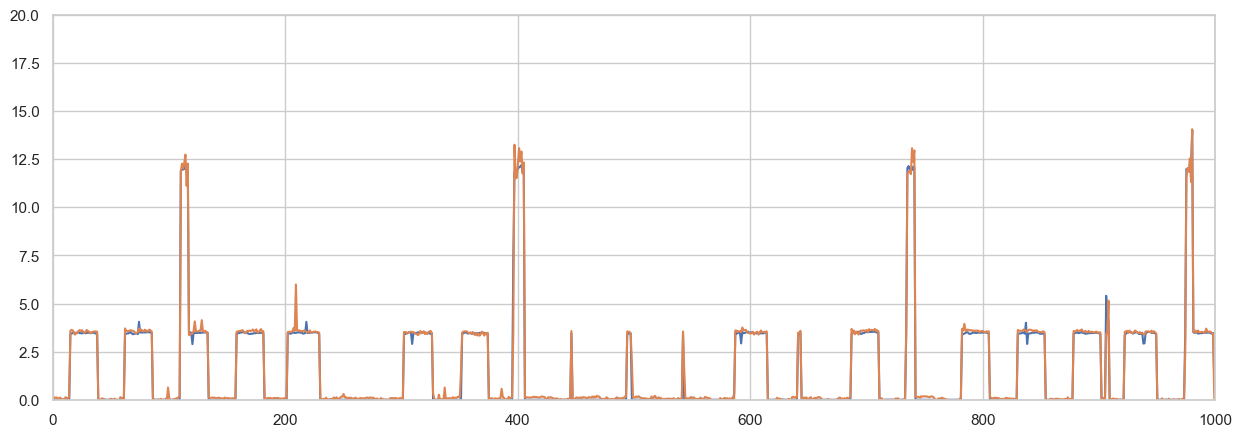

In [33]:
plt.figure(figsize=[15,5])
plt.plot(y_data_inv.T[0])
plot = plt.plot(yhat_training_inv.T[0])
plt.ylim([0,20])
plt.xlim([0,1000])

## Testing Evaluation

In [34]:
yhat_testing = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, yhat_testing)
print('RMSE training',rms)

mae = mean_absolute_error(y_test, yhat_testing)
print('MAE: training',mae)

RMSE training 0.08991968297746918
MAE: training 0.19956552744584002


In [36]:
y_test_inv = min_max_scaler.inverse_transform(y_test)
yhat_testing_inv = min_max_scaler.inverse_transform(yhat_testing)

mae_inv = mean_absolute_error(y_test_inv.T, yhat_testing_inv.T)
print('MAE training',mae_inv)

MAE training 8.042210319257252


In [37]:
mae_inv = mean_absolute_error(y_test_inv.T[0], yhat_testing_inv.T[0])
print('MAE training',mae_inv)

MAE training 3.2021143717260583


(0.0, 1300.0)

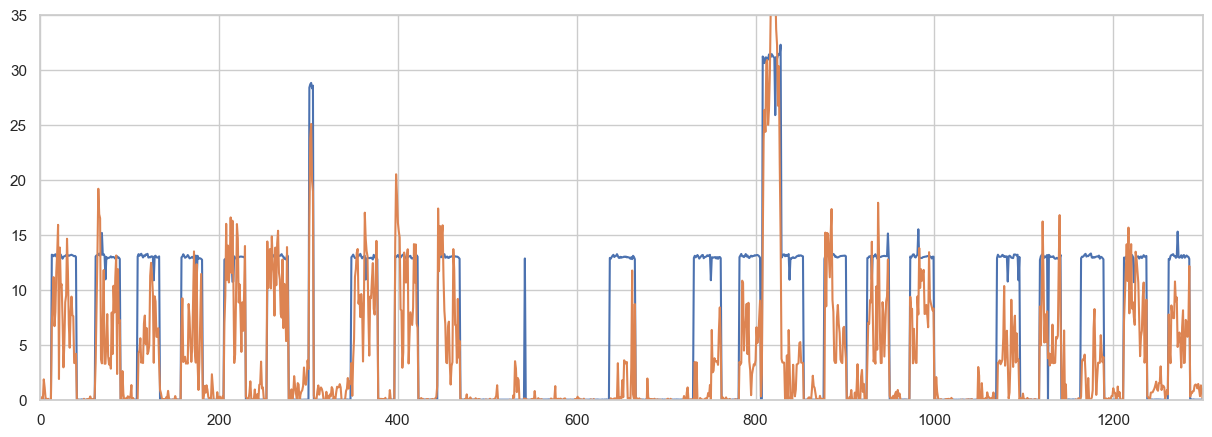

In [38]:
plt.figure(figsize=[15,5])
plt.plot(y_test_inv.T[0])
plot = plt.plot(yhat_testing_inv.T[0])
plt.ylim([0,35])
plt.xlim([0,1300])

# CNN - GRU (Gated Recurrent Unit)

Gated Recurrent Unit (GRU) is another popular type of Recurrent Neural Network similar to LSTM. It utilizes a gated mechanism to form both long­ and short­term memory by
incorporating two gates, including the reset and the update gate. Thus, its difference from
LSTM is that it does not use an output gate employing, this way, less trainable parameters.
This approach often results in a similar performance to the LSTM but with faster training.
We implement a GRU Neural Network utilizing the Tensorflow­Keras API.

A hybrid approach consisting of both CNN and GRU could result in a more robust and enhanced model. This technique is widely used in many research fields, such as activity recognition, image, and video description. The primary idea is to construct a type of encoderdecoder model architecture. Precisely, the CNN handles the feature extraction procedure, while the LSTM uses the features and analyzes their time sequence to make forecasting.

In [39]:
# define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(11,500)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(1))
model.add(GRU(50, activation='relu',  return_sequences=True))
model.add(GRU(50, activation='relu'))
model.add(Dense(11))
model.compile(optimizer='adam', loss='mse')
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 9, 64)          │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 1, 50)          │        46,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,125 (617.68 KB)

 Trainable params: 158,125 (617.68 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0062
Epoch 2/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029
Epoch 3/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025
Epoch 4/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 5/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
Epoch 6/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 7/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 8/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 9/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 10/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 11/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 12/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 13/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 14/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017
Epoch 15/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6584e-04
Epoch 156/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0562e-04
Epoch 157/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7680e-04
Epoch 158/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4981e-04
Epoch 159/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6875e-04
Epoch 160/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6092e-04
Epoch 161/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0944e-04
Epoch 162/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8396e-04
Epoch 163/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3197e-04
Epoch 164/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4362e-04
Epoch 165/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0006e-04
Epoch 166/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3364e-04
Epoch 167/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7183e-04
Epoch 168/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

## Training Evaluation

In [41]:
yhat_training = model.predict(X_train)

271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_train, yhat_training)
print('RMSE training',rms)

mae = mean_absolute_error(y_train, yhat_training)
print('MAE: training',mae)

RMSE training 0.00020253187204008298
MAE: training 0.007360616158198552


In [43]:
y_data_inv = min_max_scaler.inverse_transform(y_train)
yhat_training_inv = min_max_scaler.inverse_transform(yhat_training)

mae_inv = mean_absolute_error(y_data_inv.T, yhat_training_inv.T)
print('MAE training',mae_inv)

MAE training 0.28450416609732715


In [44]:
mae_inv = mean_absolute_error(y_data_inv.T[0], yhat_training_inv.T[0])
print('MAE training',mae_inv)

MAE training 0.13079707991020884


(0.0, 1000.0)

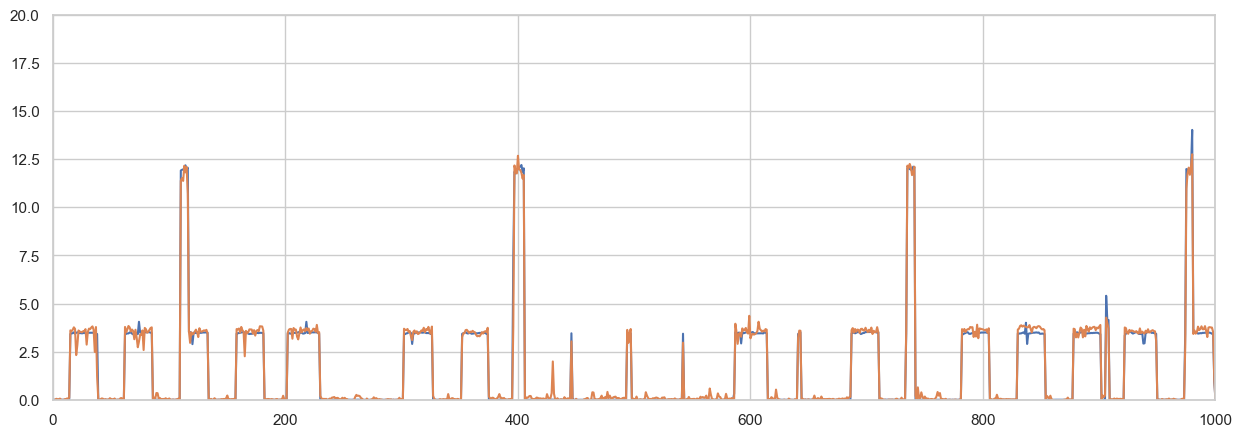

In [45]:
plt.figure(figsize=[15,5])
plt.plot(y_data_inv.T[0])
plot = plt.plot(yhat_training_inv.T[0])
plt.ylim([0,20])
plt.xlim([0,1000])

## Testing Evaluation

In [46]:
yhat_testing = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, yhat_testing)
print('RMSE training',rms)

mae = mean_absolute_error(y_test, yhat_testing)
print('MAE: training',mae)

RMSE training 0.07300833213361725
MAE: training 0.1843854537793268


In [48]:
y_test_inv = min_max_scaler.inverse_transform(y_test)
yhat_testing_inv = min_max_scaler.inverse_transform(yhat_testing)

mae_inv = mean_absolute_error(y_test_inv.T, yhat_testing_inv.T)
print('MAE training',mae_inv)

MAE training 6.995453150813947


In [50]:
mae_inv = mean_absolute_error(y_test_inv.T[0], yhat_testing_inv.T[0])
print('MAE training',mae_inv)

MAE training 3.897597926470683


(0.0, 1300.0)

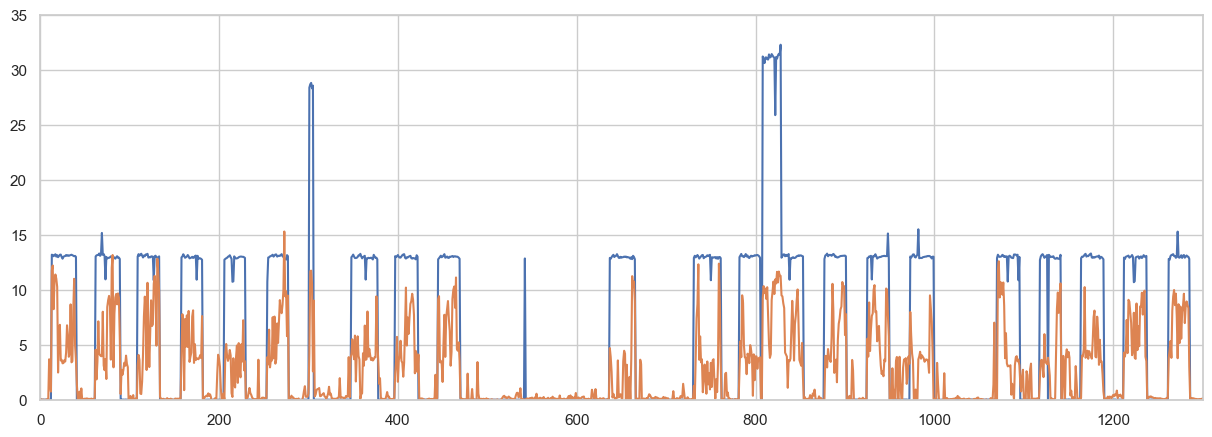

In [51]:
plt.figure(figsize=[15,5])
plt.plot(y_test_inv.T[0])
plot = plt.plot(yhat_testing_inv.T[0])
plt.ylim([0,35])
plt.xlim([0,1300])

# CNN - LSTM (Long short­term memory)

In [52]:
# define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(11,500)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(1))
model.add(LSTM(50, activation='relu',  return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(11))
model.compile(optimizer='adam', loss='mse')
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 9, 64)          │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 50)          │        61,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,225 (696.19 KB)

 Trainable params: 178,225 (696.19 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0082
Epoch 2/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028
Epoch 3/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025
Epoch 4/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
Epoch 5/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
Epoch 6/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 7/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 8/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 9/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 10/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 11/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 12/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 13/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 14/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 15/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7443e-04
Epoch 156/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8457e-04
Epoch 157/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8433e-04
Epoch 158/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8228e-04
Epoch 159/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7168e-04
Epoch 160/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0927e-04
Epoch 161/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1323e-04
Epoch 162/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9871e-04
Epoch 163/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9046e-04
Epoch 164/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8596e-04
Epoch 165/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8415e-04
Epoch 166/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1167e-04
Epoch 167/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8364e-04
Epoch 168/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

## Training Evaluation

In [54]:
yhat_training = model.predict(X_train)

271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_train, yhat_training)
print('RMSE training',rms)

mae = mean_absolute_error(y_train, yhat_training)
print('MAE: training',mae)

RMSE training 0.00018064767718922105
MAE: training 0.007275742843367037


In [56]:
y_data_inv = min_max_scaler.inverse_transform(y_train)
yhat_training_inv = min_max_scaler.inverse_transform(yhat_training)

mae_inv = mean_absolute_error(y_data_inv.T, yhat_training_inv.T)
print('MAE training',mae_inv)

MAE training 0.2613285302371532


In [57]:
mae_inv = mean_absolute_error(y_data_inv.T[0], yhat_training_inv.T[0])
print('MAE training',mae_inv)

MAE training 0.15931513138124956


(0.0, 1000.0)

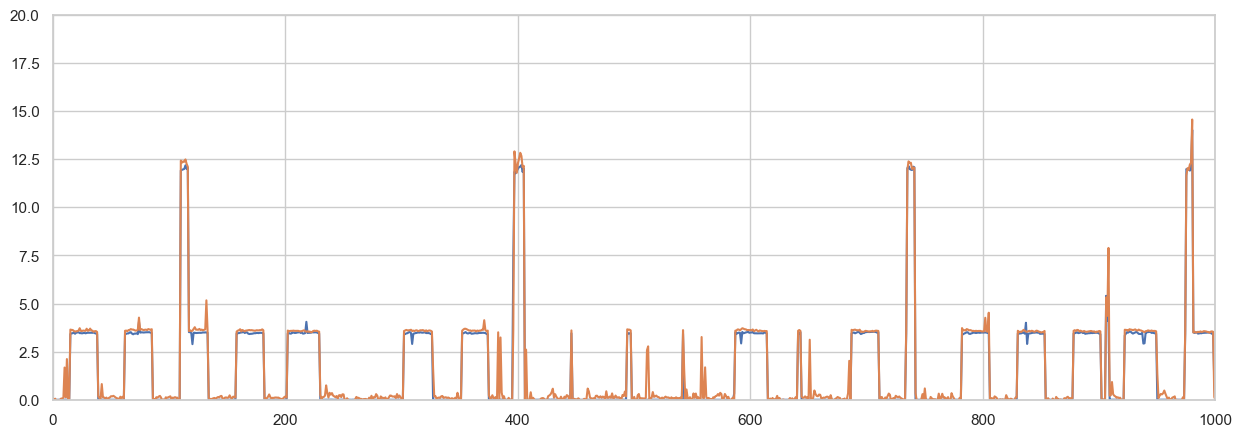

In [58]:
plt.figure(figsize=[15,5])
plt.plot(y_data_inv.T[0])
plot = plt.plot(yhat_training_inv.T[0])
plt.ylim([0,20])
plt.xlim([0,1000])

## Testing Evaluation

In [59]:
yhat_testing = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step


In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, yhat_testing)
print('RMSE training',rms)

mae = mean_absolute_error(y_test, yhat_testing)
print('MAE: training',mae)

RMSE training 0.08107683888456953
MAE: training 0.19927822499820225


In [61]:
y_test_inv = min_max_scaler.inverse_transform(y_test)
yhat_testing_inv = min_max_scaler.inverse_transform(yhat_testing)

mae_inv = mean_absolute_error(y_test_inv.T, yhat_testing_inv.T)
print('MAE training',mae_inv)

MAE training 7.2678901984482085


In [62]:
mae_inv = mean_absolute_error(y_test_inv.T[0], yhat_testing_inv.T[0])
print('MAE training',mae_inv)

MAE training 4.782341587786033


(0.0, 1300.0)

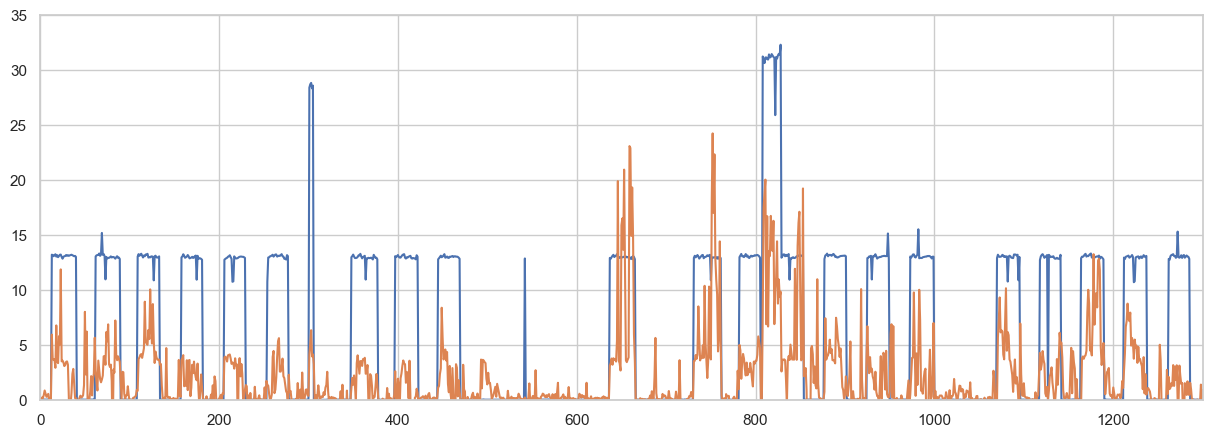

In [63]:
plt.figure(figsize=[15,5])
plt.plot(y_test_inv.T[0])
plot = plt.plot(yhat_testing_inv.T[0])
plt.ylim([0,35])
plt.xlim([0,1300])

# CNN - Bidirectional LSTM

In [64]:
# define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(11,500)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(1))
model.add(Bidirectional(LSTM(25, activation='relu',  return_sequences=True) ))
model.add(Bidirectional(LSTM(25, activation='relu') ))
model.add(Dense(11))
model.compile(optimizer='adam', loss='mse')
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 9, 64)          │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 50)          │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 50)             │        15,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,225 (657.13 KB)

 Trainable params: 168,225 (657.13 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0069
Epoch 2/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 3/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026
Epoch 4/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024
Epoch 5/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0022
Epoch 6/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 7/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 8/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 9/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 10/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 11/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 12/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 13/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 14/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 15/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1902e-04
Epoch 156/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8103e-04
Epoch 157/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9080e-04
Epoch 158/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2122e-04
Epoch 159/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0346e-04
Epoch 160/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9661e-04
Epoch 161/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.6084e-04
Epoch 162/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9571e-04
Epoch 163/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7279e-04
Epoch 164/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8397e-04
Epoch 165/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3189e-04
Epoch 166/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8401e-04
Epoch 167/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1335e-04
Epoch 168/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

## Training Evaluation

In [66]:
yhat_training = model.predict(X_train)

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_train, yhat_training)
print('RMSE training',rms)

mae = mean_absolute_error(y_train, yhat_training)
print('MAE: training',mae)

RMSE training 0.0001754751602624817
MAE: training 0.006944090752109086


In [68]:
y_data_inv = min_max_scaler.inverse_transform(y_train)
yhat_training_inv = min_max_scaler.inverse_transform(yhat_training)

mae_inv = mean_absolute_error(y_data_inv.T, yhat_training_inv.T)
print('MAE training',mae_inv)

MAE training 0.2610480786600562


In [69]:
mae_inv = mean_absolute_error(y_data_inv.T[0], yhat_training_inv.T[0])
print('MAE training',mae_inv)

MAE training 0.10588870551006883


(0.0, 1000.0)

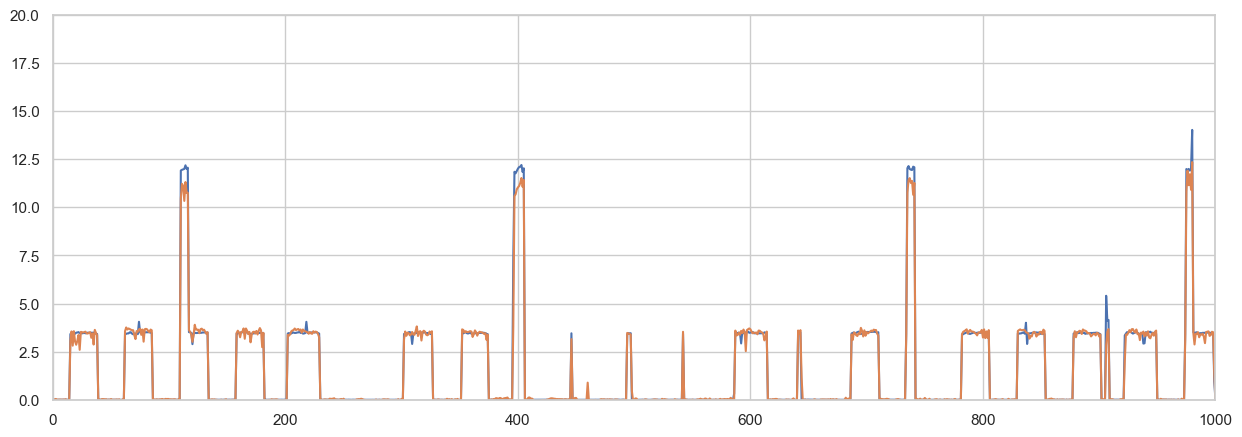

In [70]:
plt.figure(figsize=[15,5])
plt.plot(y_data_inv.T[0])
plot = plt.plot(yhat_training_inv.T[0])
plt.ylim([0,20])
plt.xlim([0,1000])

## Testing Evaluation

In [71]:
yhat_testing = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, yhat_testing)
print('RMSE training',rms)

mae = mean_absolute_error(y_test, yhat_testing)
print('MAE: training',mae)

RMSE training 0.08166554870703958
MAE: training 0.19664396200823012


In [73]:
y_test_inv = min_max_scaler.inverse_transform(y_test)
yhat_testing_inv = min_max_scaler.inverse_transform(yhat_testing)

mae_inv = mean_absolute_error(y_test_inv.T, yhat_testing_inv.T)
print('MAE training',mae_inv)

MAE training 7.23211745274909


In [74]:
mae_inv = mean_absolute_error(y_test_inv.T[0], yhat_testing_inv.T[0])
print('MAE training',mae_inv)

MAE training 4.023342009731235


(0.0, 1300.0)

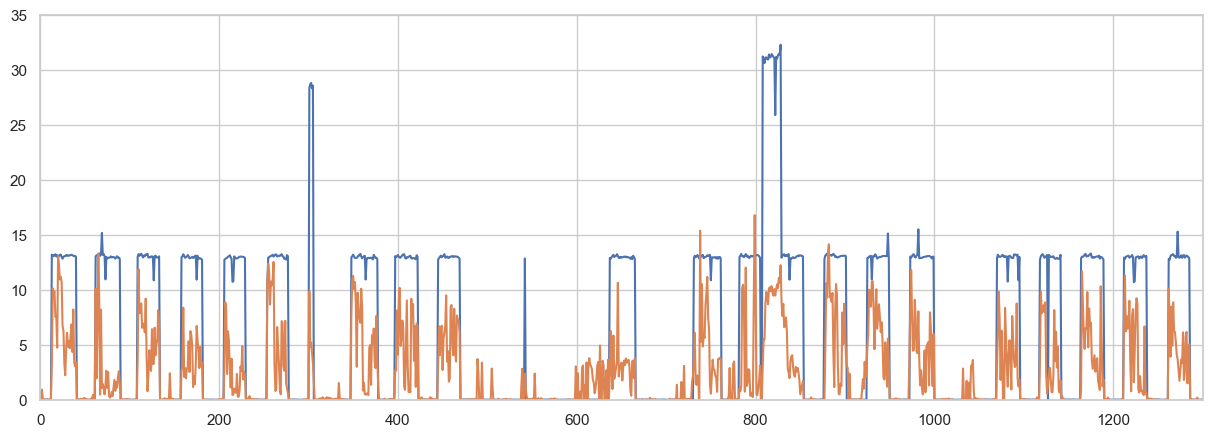

In [75]:
plt.figure(figsize=[15,5])
plt.plot(y_test_inv.T[0])
plot = plt.plot(yhat_testing_inv.T[0])
plt.ylim([0,35])
plt.xlim([0,1300])

# CNN - Bidirectional GRU

In [76]:
# define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(11,500)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(1))
model.add(Bidirectional(GRU(25, activation='relu',  return_sequences=True) ))
model.add(Bidirectional(GRU(25, activation='relu') ))
model.add(Dense(11))
model.compile(optimizer='adam', loss='mse')
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 9, 64)          │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_3 (RepeatVector)  │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 1, 50)          │        42,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 50)             │        11,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 11)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,625 (588.38 KB)

 Trainable params: 150,625 (588.38 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.fit(X_train,y_train,epochs=300)

Epoch 1/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0061
Epoch 2/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029
Epoch 3/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025
Epoch 4/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024
Epoch 5/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023
Epoch 6/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 7/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 8/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 9/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020
Epoch 10/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 11/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 12/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 13/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 14/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 15/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1895e-04
Epoch 156/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2004e-04
Epoch 157/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8280e-04
Epoch 158/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4581e-04
Epoch 159/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4516e-04
Epoch 160/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4897e-04
Epoch 161/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1938e-04
Epoch 162/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9108e-04
Epoch 163/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0773e-04
Epoch 164/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2443e-04
Epoch 165/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0510e-04
Epoch 166/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9515e-04
Epoch 167/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2025e-04
Epoch 168/300
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

## Training Evaluation

In [78]:
yhat_training = model.predict(X_train)

271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_train, yhat_training)
print('RMSE training',rms)

mae = mean_absolute_error(y_train, yhat_training)
print('MAE: training',mae)

RMSE training 0.00017518581623278894
MAE: training 0.007020296013528441


In [80]:
y_data_inv = min_max_scaler.inverse_transform(y_train)
yhat_training_inv = min_max_scaler.inverse_transform(yhat_training)

mae_inv = mean_absolute_error(y_data_inv.T, yhat_training_inv.T)
print('MAE training',mae_inv)

MAE training 0.2683683953129944


In [81]:
mae_inv = mean_absolute_error(y_data_inv.T[0], yhat_training_inv.T[0])
print('MAE training',mae_inv)

MAE training 0.11037038961917434


(0.0, 1000.0)

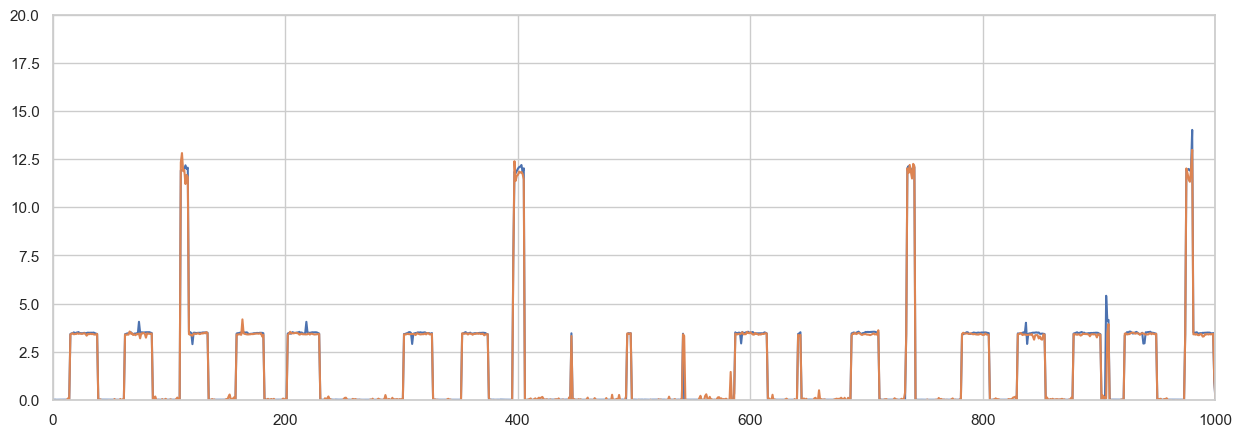

In [82]:
plt.figure(figsize=[15,5])
plt.plot(y_data_inv.T[0])
plot = plt.plot(yhat_training_inv.T[0])
plt.ylim([0,20])
plt.xlim([0,1000])

## Testing Evaluation

In [83]:
yhat_testing = model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

rms = mean_squared_error(y_test, yhat_testing)
print('RMSE training',rms)

mae = mean_absolute_error(y_test, yhat_testing)
print('MAE: training',mae)

RMSE training 0.11953470882707927
MAE: training 0.23339976636167747


In [85]:
y_test_inv = min_max_scaler.inverse_transform(y_test)
yhat_testing_inv = min_max_scaler.inverse_transform(yhat_testing)

mae_inv = mean_absolute_error(y_test_inv.T, yhat_testing_inv.T)
print('MAE training',mae_inv)

MAE training 8.528703623394216


In [86]:
mae_inv = mean_absolute_error(y_test_inv.T[0], yhat_testing_inv.T[0])
print('MAE training',mae_inv)

MAE training 5.842039968722132


(0.0, 1300.0)

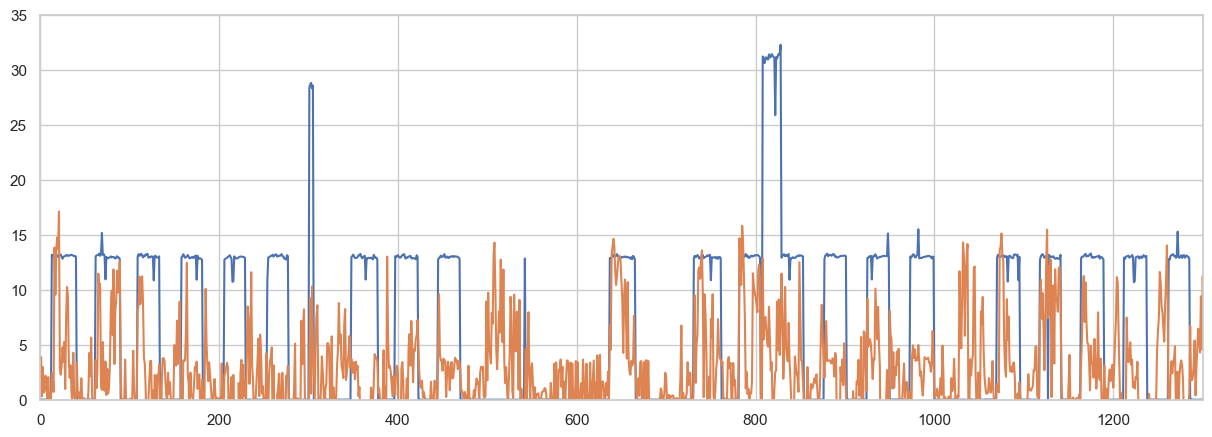

In [87]:
plt.figure(figsize=[15,5])
plt.plot(y_test_inv.T[0])
plot = plt.plot(yhat_testing_inv.T[0])
plt.ylim([0,35])
plt.xlim([0,1300])

# Model Comparison

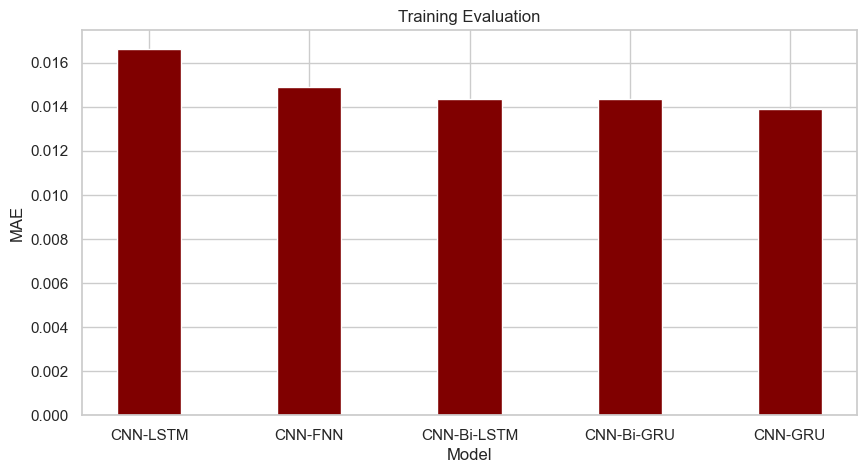

In [88]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'CNN-LSTM':0.01664985 0.01664, 'CNN-FNN':0.008458, 'CNN-Bi-LSTM':0.01436,
        'CNN-Bi-GRU':0.01435, 'CNN-GRU':0.01390}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Training Evaluation")
plt.show()

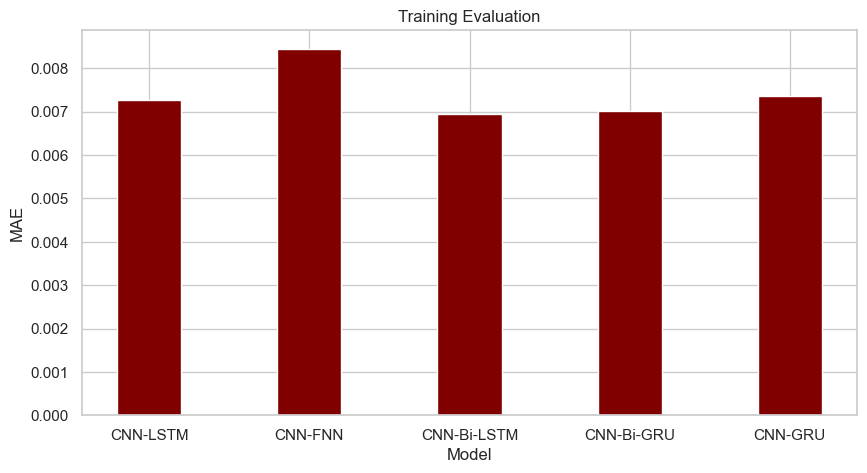

In [89]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'CNN-LSTM':0.007275, 'CNN-FNN':0.008458, 'CNN-Bi-LSTM':0.006944,
        'CNN-Bi-GRU':0.007020, 'CNN-GRU':0.00736}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Training Evaluation")
plt.show()

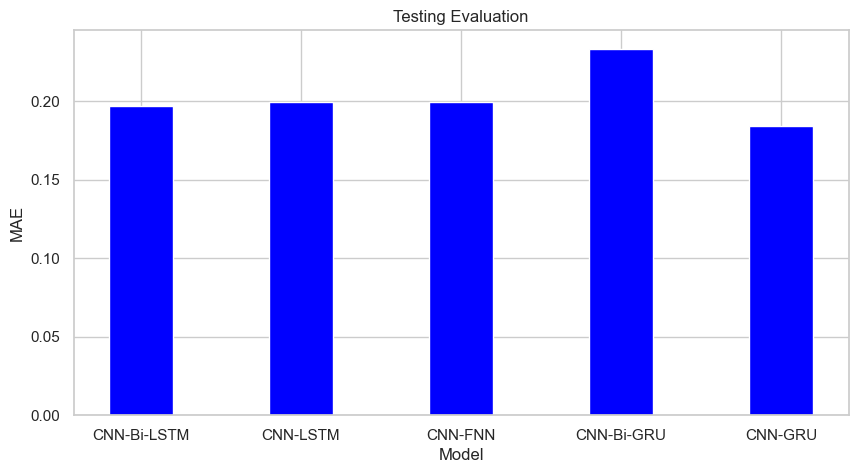

In [90]:
# creating the dataset
data = {'CNN-Bi-LSTM':0.196644, 'CNN-LSTM':0.199278, 'CNN-FNN':0.1995655, 
        'CNN-Bi-GRU':0.2333997, 'CNN-GRU':0.184385}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Testing Evaluation")
plt.show()

# AutoML